# Peaks2MapsKernel demo

In [1]:
import json, nimare
import pandas as pd
from nilearn.plotting import plot_glass_brain

## Preparing example Dataset

In [2]:
dset_dict = {}
coords_df = pd.read_csv('example_data/coordinates.csv')
for i, row in pd.read_csv('example_data/studies.csv').iterrows():
    this_study_coords = coords_df[coords_df['study_id'] == row[0]]
    contrast = {"sample_sizes": [row[1]],
                "coords": { "space": this_study_coords['space'].unique()[0],
                            "x": list(this_study_coords['x']),
                            "y": list(this_study_coords['y']),
                            "z": list(this_study_coords['z'])}}
    dset_dict[row[0]] = {"contrasts": {"1": contrast }}

with open("example_data/tmp.json", 'w') as fp:
    json.dump(dset_dict, fp)

In [3]:
dset = nimare.dataset.Dataset("tmp.json")
mask_img = dset.mask

## Transforming from peak coordinates to maps using peaks2maps model

In [4]:
k = nimare.meta.cbma.kernel.Peaks2MapsKernel(dset.coordinates, mask=dset.mask)
imgs = k.transform(ids=dset.ids, masked=True)

INFO:nimare.meta.cbma.utils:Downloading the model (this is a one-off operation)...


HBox(children=(IntProgress(value=0, max=326), HTML(value='')))

INFO:nimare.meta.cbma.utils:Uncompressing the model to %s...


## Plotting the results

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until e

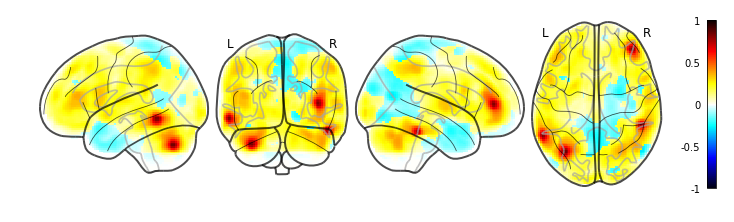

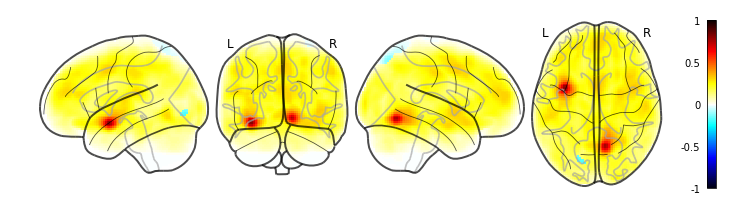

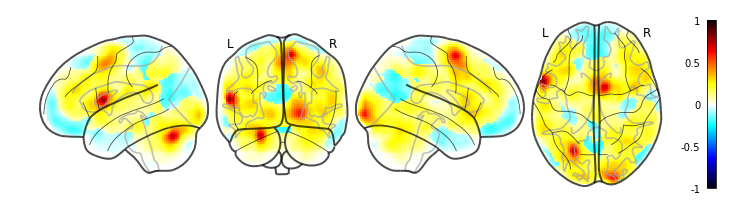

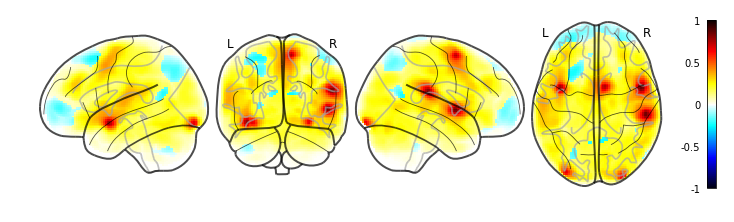

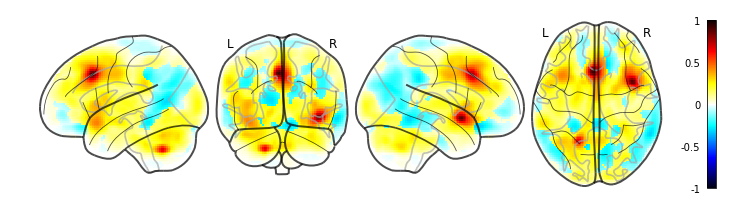

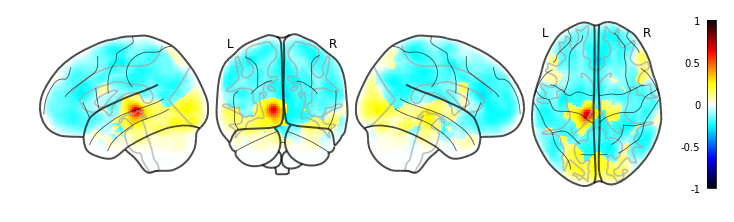

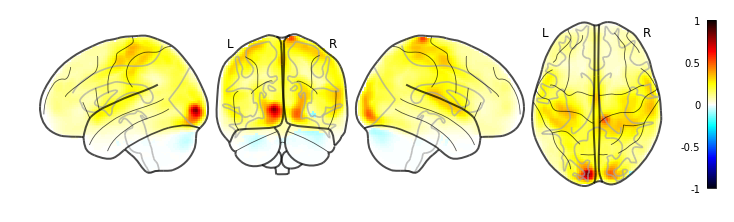

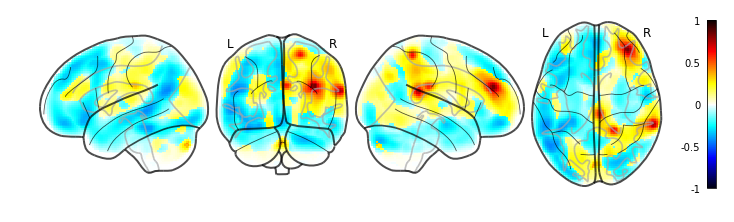

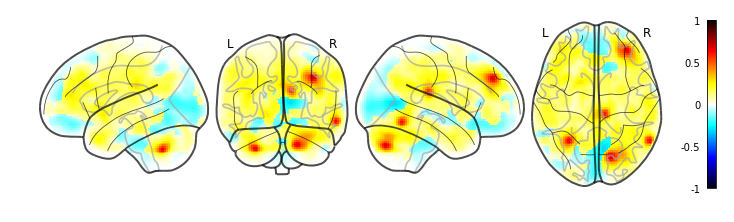

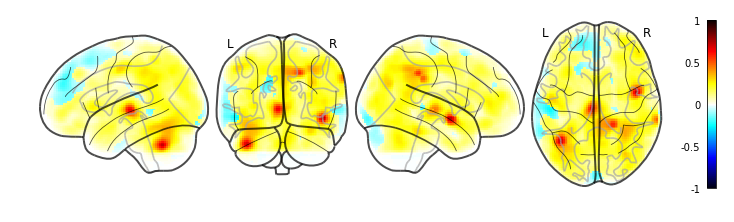

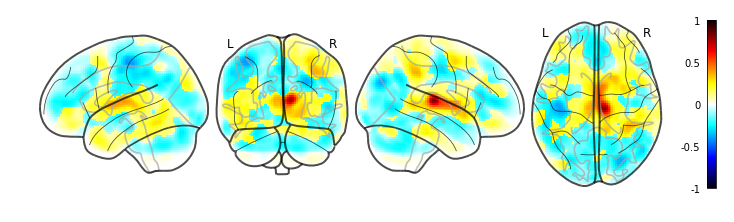

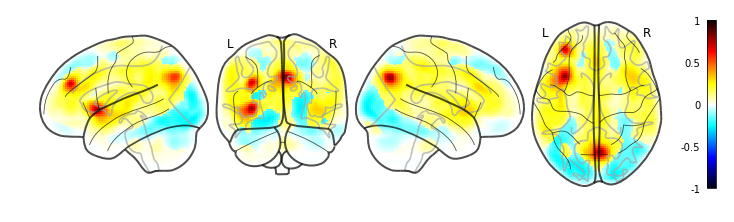

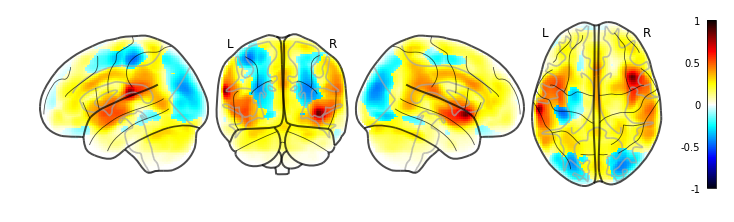

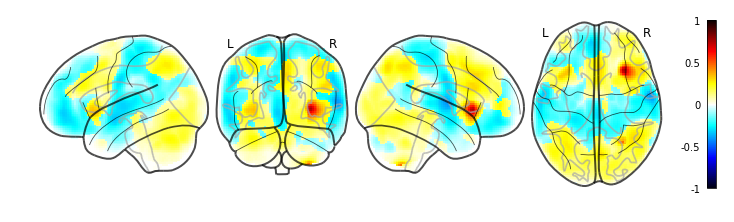

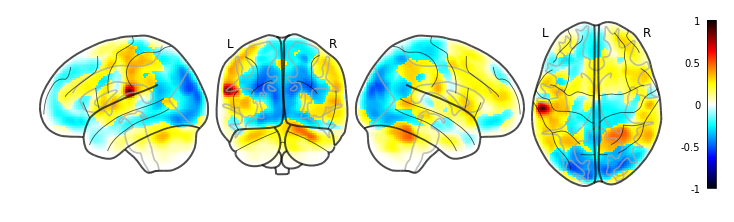

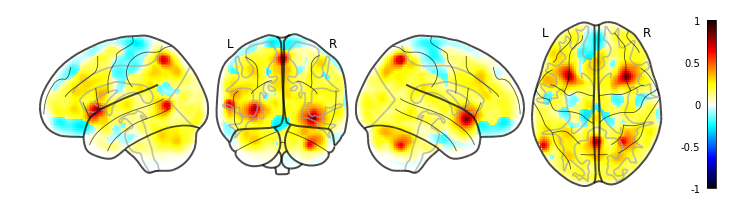

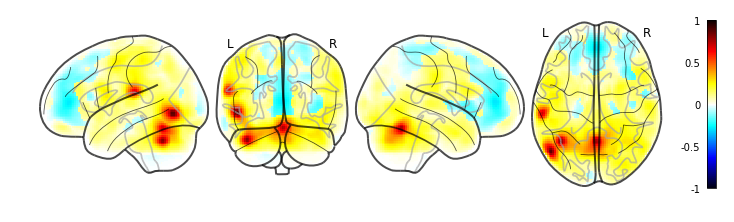

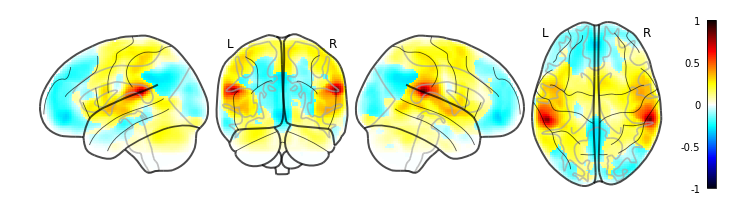

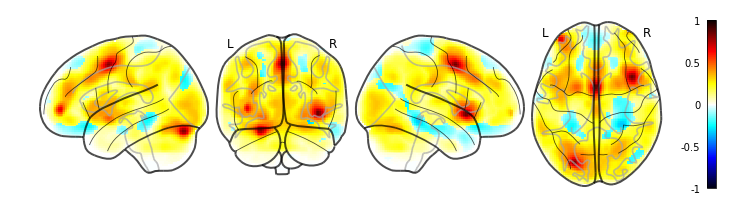

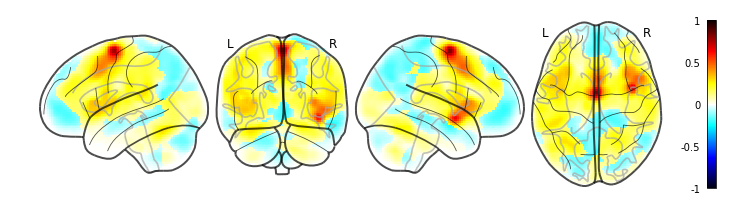

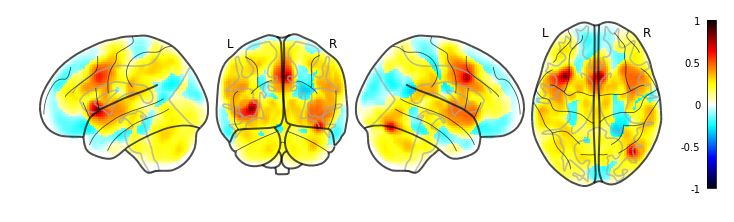

In [5]:
for img in imgs:
    display = plot_glass_brain(img, display_mode='lyrz',
                               plot_abs=False, colorbar=True,
                               vmax=1, threshold=0)